In [29]:
import keras
from keras.models import load_model
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras import models
import numpy as np

model = load_model('mnist.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [15]:
(train_img, train_label), (test_img, test_label) = mnist.load_data()

train_img = train_img.reshape((60000, 28, 28, 1))
train_img = train_img.astype('float32') / 255

test_img = test_img.reshape((10000, 28, 28, 1))
test_img = test_img.astype('float32') / 255

#test_img[0].shape
#plt.imshow(test_img[0], cmap='gray')
#plt.show()

In [25]:
layer_out = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_out)
activations = activation_model.predict(test_img)
first_activation = activations[0]
first_activation.shape

(10000, 26, 26, 32)

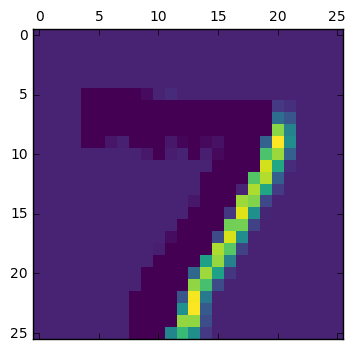

In [22]:
plt.matshow(first_activation[0,:,:,25],cmap='viridis')
plt.show()

/Users/dmitriykhvan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in divide


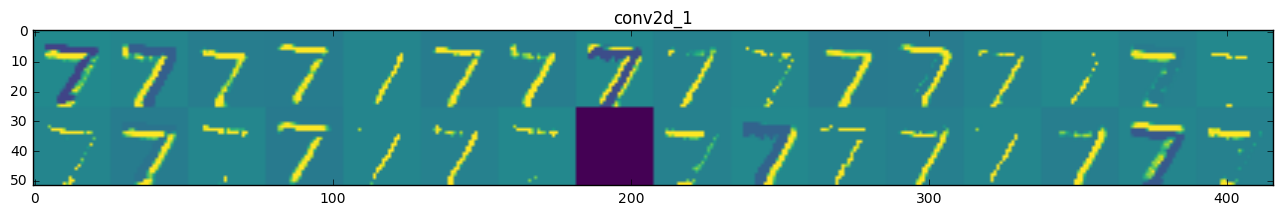

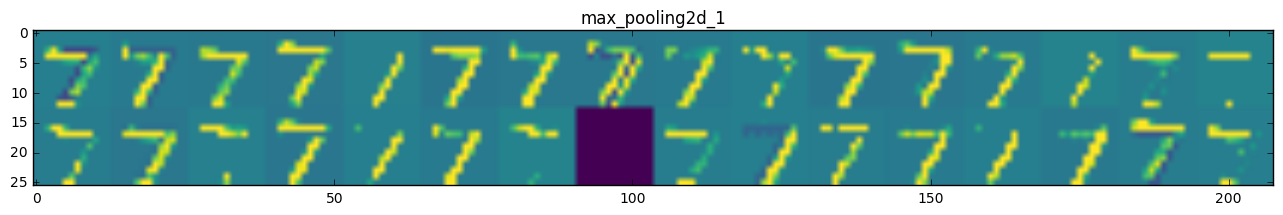

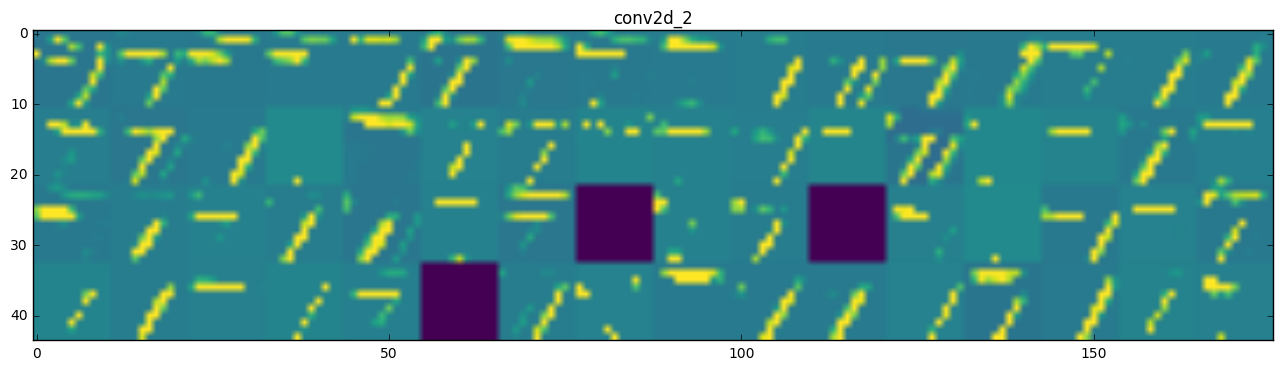

In [40]:
layer_names=[]

for layer in model.layers[:8]:
    layer_names.append(layer.name)

img_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_filters = layer_activation.shape[-1]
    map_size = layer_activation.shape[1]
    n_rows = n_filters // img_per_row
    grid = np.zeros((map_size*n_rows, map_size*img_per_row))
    
    for row in range(n_rows):
        for col in range(img_per_row):
            channel_img = layer_activation[0,:,:,row * img_per_row + col]
            channel_img -= channel_img.mean()
            channel_img /= channel_img.std()
            channel_img *= 64
            channel_img += 128
            channel_img = np.clip(channel_img, 0, 255).astype('uint8')
            grid[row*map_size : (row+1)*map_size, col*map_size : (col+1)*map_size] = channel_img
    
    scale = 1./map_size
    plt.figure(figsize=(scale*grid.shape[1],scale*grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(grid, aspect='auto', cmap='viridis')

plt.show()